In [15]:
import os
from tensorflow.keras import models
import matplotlib.pyplot as plt
from skimage.io import imread 
import cv2
import numpy as np

FILENAME = os.path.abspath('model/catsdogs_inception_28_06-12_13.h5')
ROOT_PATH = "C:\\Users\\alber\\OneDrive\\Escritorio\\dogs&cats"

TEST_PATH = os.path.join(ROOT_PATH, "test")

IM_SIZE = 224

In [16]:
def read_data(path, im_size=224):
    X = []
    Y = []

    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (im_size, im_size))
        
        X.append(smallimage)
        
        category = file.split('.')[0]
        if category == 'dog':
            Y.append(1)
        else:
            Y.append(0)

    return np.array(X), np.array(Y)

X_test, y_test = read_data(TEST_PATH)

In [86]:
X_test = X_test[:100] / 255

In [81]:
X_test[0].shape

(224, 224, 3)

In [6]:
model = models.load_model(FILENAME)

In [27]:
X_test.shape

(12500, 224, 224, 3)

In [30]:
X_test_sample = np.random.shuffle(X_test.copy())#[:10]

In [31]:
X_test_sample

In [87]:
predictions_array = model.predict(X_test)

4/4 [==============================] - 8s 2s/step


In [65]:
cat_res.shape

(224, 224, 3)

In [97]:
def plot_value(i, path, pred):

    img = imread(os.path.join(path, f'{i + 1}.jpg'))
    img_res = cv2.resize(img, (224, 224))
    plt.imshow(img_res)
    # model.predict(cat_res.reshape(1, 224, 224, 3))
    print('Probabilidad de que sea perro: {:.2f}'.format(pred[i][0]))

In [96]:
predictions_array[0][0]

0.29188988

Probabilidad de que sea perro: 0.29


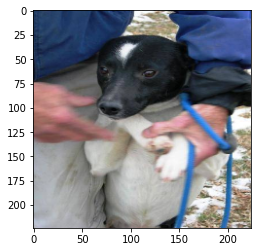

In [99]:
plot_value(0, TEST_PATH, predictions_array)

Probabilidad de que sea perro: 0.33


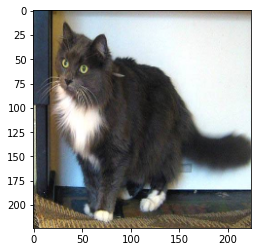

In [100]:
plot_value(8, TEST_PATH, predictions_array)

Probabilidad de que sea perro: 0.00


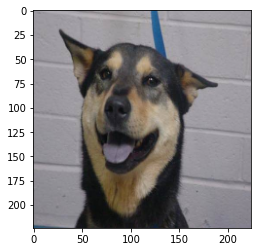

In [101]:
plot_value(26, TEST_PATH, predictions_array)

array([0.41001198], dtype=float32)

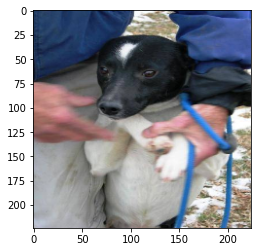

In [82]:
cat = imread(os.path.join(TEST_PATH, '1.jpg'))
cat_res = cv2.resize(cat, (224, 224))
plt.imshow(cat_res)
# model.predict(cat_res.reshape(1, 224, 224, 3))
predictions_array[0]

array([0.29244074], dtype=float32)

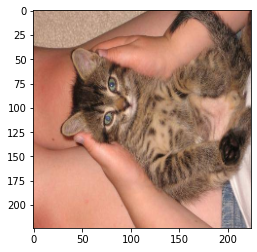

In [84]:
dog = imread(os.path.join(TEST_PATH, '6.jpg'))
dog_res = cv2.resize(dog, (224, 224))
plt.imshow(dog_res)
# model.predict(dog_res.reshape(1, 224, 224, 3))
predictions_array[5]

array([[[12,  8,  5],
        [12,  8,  5],
        [12,  8,  5],
        ...,
        [41, 25, 10],
        [40, 27, 11],
        [36, 23,  7]],

       [[10,  9,  5],
        [10,  9,  5],
        [10,  9,  5],
        ...,
        [45, 29, 14],
        [39, 26, 10],
        [36, 24,  8]],

       [[ 9, 10,  5],
        [ 8, 10,  5],
        [ 8, 10,  5],
        ...,
        [41, 25, 10],
        [37, 24,  8],
        [38, 25,  9]],

       ...,

       [[67, 49, 64],
        [69, 49, 61],
        [62, 39, 49],
        ...,
        [84, 60, 73],
        [88, 64, 78],
        [90, 66, 80]],

       [[67, 49, 64],
        [69, 48, 61],
        [62, 39, 49],
        ...,
        [79, 55, 69],
        [92, 68, 82],
        [90, 67, 81]],

       [[70, 52, 67],
        [71, 50, 63],
        [65, 42, 52],
        ...,
        [84, 60, 73],
        [91, 67, 81],
        [86, 62, 76]]], dtype=uint8)

In [55]:
model.predict(imread(os.path.join(TEST_PATH, '10.jpg')).resize(224, 224, 3))

ValueError: cannot resize this array: it does not own its data

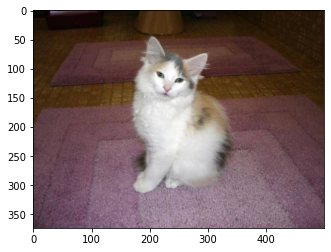

In [50]:
plt.imshow(imread(os.path.join(TEST_PATH, '10.jpg')))

In [45]:
predictions_array

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [39]:
y_test[:2]

array([0, 0])

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.round(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

NameError: name 'predictions' is not defined

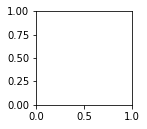

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i, j in enumerate(np.random.randint(0, 10000, (15,))):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(j, predictions[j], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(j, predictions[j], test_labels)
plt.tight_layout()
plt.show()